## Population Sex Difference

Humans society is composed of 2 main types of people, males and females. While there is a great deal of discussion today about people who fall outside of those categories, the fact of the matter is that they are not prepvelant enough to be statiscally significant. We live in a diverse world, in some cultures the differences between the roles of males and females are worlds apart while in others the difference in roles is near zero. While it is near impossible to quatify how different males' and females' roles are in each country, we can very easily look at another number: their population.

What can we infer from a countries sex ratio? Does difference in gender ratio affect population growth?? How much difference in population number can be tolerated? Before we can answer any of these questions, we must have data we can analyze. 

We will use UN data from a 2013 population survey and prediction of all UN countries. Though the survey was started in 2013, the data was recently updated in 2017.

First, let's set up our Python coding environment.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
%matplotlib inline

## Importing and Inspecting the Dataset


Let's import and the data we are going to be using to look at estimated population growth. As we said before, this is UN data last updated in 2017. As such, the population values from 2017 and earlier are factual data while values from 2018 and later are predictions.

In [2]:
world_pop = pd.read_csv('C:\Code\Data\pop.csv')

world_pop.describe()

,Year(s),Value
count,82719.000000,8.271900e+04
mean,2050.000000,3.026449e+05
std,29.154936,1.180433e+06
min,2000.000000,6.480000e-01
25%,2025.000000,7.910520e+02
50%,2050.000000,9.516296e+03
75%,2075.000000,5.730047e+04
max,2100.000000,1.652124e+07


In [3]:
world_pop_f = pd.read_csv('C:\Code\Data\popf.csv')

world_pop_f.describe()

,Year(s),Value
count,82719.000000,8.271900e+04
mean,2050.000000,1.504109e+05
std,29.154936,5.856047e+05
min,2000.000000,3.420000e-01
25%,2025.000000,3.936625e+02
50%,2050.000000,4.774002e+03
75%,2075.000000,2.889066e+04
max,2100.000000,8.196724e+06


In [4]:
world_pop_m = pd.read_csv('C:\Code\Data\popm.csv')

world_pop_m.describe()

,Year(s),Value
count,82719.000000,8.271900e+04
mean,2050.000000,1.522339e+05
std,29.154936,5.948621e+05
min,2000.000000,3.130000e-01
25%,2025.000000,3.956965e+02
50%,2050.000000,4.722964e+03
75%,2075.000000,2.845079e+04
max,2100.000000,8.324521e+06


For all 3 data sets, the row counts, 82719, and number of column with numeric values, 2, are the same. Since our data came from the same source this means they are probably in the same format. The values for the Year(s) coloumn certainly makes sense, as our years span from 2000 to 2100. The values for the Value column seem to make sense as well, as the male and female population should be about half the world population

Before we go on let's make sure we have no missing values in any of our data sets.

In [5]:
world_pop.isnull().sum()
world_pop_f.isnull().sum()

Country or Area    0
Year(s)            0
Variant            0
Value              0
dtype: int64

In [6]:
world_pop_f.isnull().sum()

Country or Area    0
Year(s)            0
Variant            0
Value              0
dtype: int64

In [7]:
world_pop_m.isnull().sum()

Country or Area    0
Year(s)            0
Variant            0
Value              0
dtype: int64

Perfect, no missing values in any of the columns of our 3 data sets. Now that we know we aren't missing any values, let's take a look at the data in tabular format. Since our 3 data sets, have a similar format, let's just take a look a the mixed sex world population data set. 

In [8]:
world_pop

,Country or Area,Year(s),Variant,Value
0,Afghanistan,2100,Medium,70409.629
1,Afghanistan,2100,High,105167.028
2,Afghanistan,2100,Low,44841.532
3,Afghanistan,2099,Medium,70604.652
4,Afghanistan,2099,High,104678.263
5,Afghanistan,2099,Low,45387.714
6,Afghanistan,2098,Medium,70793.669
7,Afghanistan,2098,High,104184.165
8,Afghanistan,2098,Low,45933.673
9,Afghanistan,2097,Medium,70975.797


In [9]:
#maybe add section about inspecting country names.

It seems there really are only 4 columns, but there are 82,719 rows. Even acccounting for 100 year rows per country, thats way too many rows for this data. That would imply over over 820 countries in the UN, there aren't even that many on earth. Let's look through the 4 columns to explain this.

The first column __Country or Area__ contains a list of all the UN countries identifying the country the row's data describes. The secound column __Year(s)__ contains a list of years ranging from 2000 to 2100, note we there are actually 101 years represented not 100. 

The third column __Variant__ contains the strings 'Medium', 'High', or 'Low' identifying the type of population prediction.  This data actually contains 3 different population predictions: average or medium population growth, high population growth, and low population growth. This is where are the extra rows in our data are coming from. 

The fourth column __Value__ contains a number containing the population prediction, in thousands of people.


## Visualizing our Data


While we certainly understand the data much more now, it is still not very disgestable in this tabular format. Let's create some graphical visualiations to assist us.  To start, why don't we look at how the population of the world's 10 most populous countries, order: China, India, The United States, Indonesia, Brazil, Pakistan, Nigeria, Bangladesh, Russia, and Mexico will change.  Let's begin by just graphing the medium estimated population growth

In [10]:
china_pop = world_pop[world_pop['Country or Area']=='China']
india_pop = world_pop[world_pop['Country or Area']=='India']
us_pop = world_pop[world_pop['Country or Area']=='United States of America']
indonesia_pop = world_pop[world_pop['Country or Area']=='Indonesia']
brazil_pop = world_pop[world_pop['Country or Area']=='Brazil']
paki_pop = world_pop[world_pop['Country or Area']=='Pakistan']
nigeria_pop = world_pop[world_pop['Country or Area']=='Nigeria']
bang_pop = world_pop[world_pop['Country or Area']=='Bangladesh']
russia_pop = world_pop[world_pop['Country or Area']=='Russian Federation']
mexico_pop = world_pop[world_pop['Country or Area']=='Mexico']
#initialize data frames for the 6 most populous countries
#having these will come in handy later

china_pop_med = china_pop[china_pop['Variant']=='Medium']
india_pop_med = india_pop[india_pop['Variant']=='Medium']
us_pop_med = us_pop[us_pop['Variant']=='Medium']
indonesia_pop_med = indonesia_pop[indonesia_pop['Variant']=='Medium']
brazil_pop_med = brazil_pop[brazil_pop['Variant']=='Medium']
paki_pop_med = paki_pop[paki_pop['Variant']=='Medium']
nigeria_pop_med = nigeria_pop[nigeria_pop['Variant']=='Medium']
bang_pop_med = bang_pop[bang_pop['Variant']=='Medium']
russia_pop_med = russia_pop[russia_pop['Variant']=='Medium']
mexico_pop_med = mexico_pop[mexico_pop['Variant']=='Medium']
#initialize data frames for 6 most populous countires medium predictions



We've created 2 sets of data frames.  The first 10 contain all the population estimates for the current 10 most populous countries repectively while the second 10 contain the same data but only with the medium population estimates.  For now, we'll just use the medium estimate data frames, the first set will be useful later on.

Let's set up a scatterplot with all 10 countries' medium population estimates on it. 

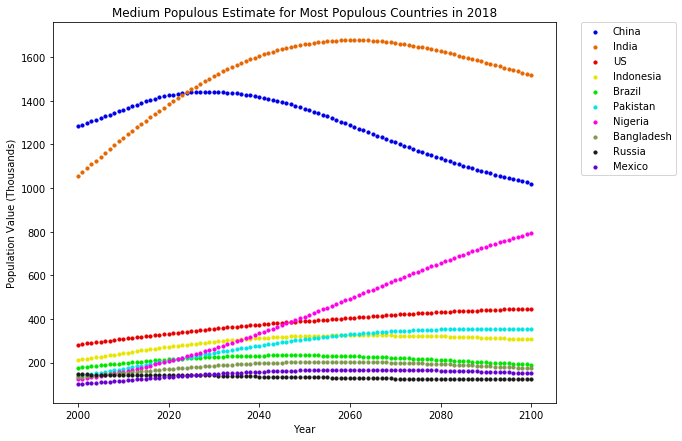

In [11]:
plt.figure(figsize=(9,7))
plt.scatter(x=china_pop_med['Year(s)'], y=china_pop_med['Value']/1000, s=10, color=(0.0,0.0,0.9), label='China')
plt.scatter(x=india_pop_med['Year(s)'], y=india_pop_med['Value']/1000, s=10, color=(0.9,0.4,0.0), label='India')
plt.scatter(x=us_pop_med['Year(s)'], y=us_pop_med['Value']/1000, s=10, color=(0.9,0.0,0.0), label='US')
plt.scatter(x=indonesia_pop_med['Year(s)'], y=indonesia_pop_med['Value']/1000, s=10, color=(0.9,0.9,0.0), label='Indonesia')
plt.scatter(x=brazil_pop_med['Year(s)'], y=brazil_pop_med['Value']/1000, s=10, color=(0.0,0.9,0.0), label='Brazil')
plt.scatter(x=paki_pop_med['Year(s)'], y=paki_pop_med['Value']/1000, s=10, color=(0.0,0.9,0.9), label='Pakistan')
plt.scatter(x=nigeria_pop_med['Year(s)'], y=nigeria_pop_med['Value']/1000, s=10, color=(1,0.0,0.9), label='Nigeria')
plt.scatter(x=bang_pop_med['Year(s)'], y=bang_pop_med['Value']/1000, s=10, color=(0.5,0.6,0.3), label='Bangladesh')
plt.scatter(x=russia_pop_med['Year(s)'], y=russia_pop_med['Value']/1000, s=10, color=(0.1,0.1,0.1), label='Russia')
plt.scatter(x=mexico_pop_med['Year(s)'], y=mexico_pop_med['Value']/1000, s=10, color=(0.4,0.0,0.8), label='Mexico')
#we divide the population value by 1000 to put the pop value in thousands and get a cleaner graph


plt.title('Medium Populous Estimate for Most Populous Countries in 2018')
plt.xlabel('Year')
plt.ylabel('Population Value (Thousands)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

Now we can get a much better idea of what our data really looks like.  We can see from the visualization that this really is quite a thorough prediction. There isn't just a different rate of population increase with every respective prediction, each prediction has varying periods of increase and decrease. Just what we would hope for from UN data.  

While this graph has told us a lot more about our data, it is difficult to discern the changes in each population, since there values are so different.  China's and India's starting values absolutely dwarf the other 4 and all 6 curves suffer for it. Since there seem to be 2 very different groups of population sizes amoung our six countries, let's group them on 2 different graphs. 

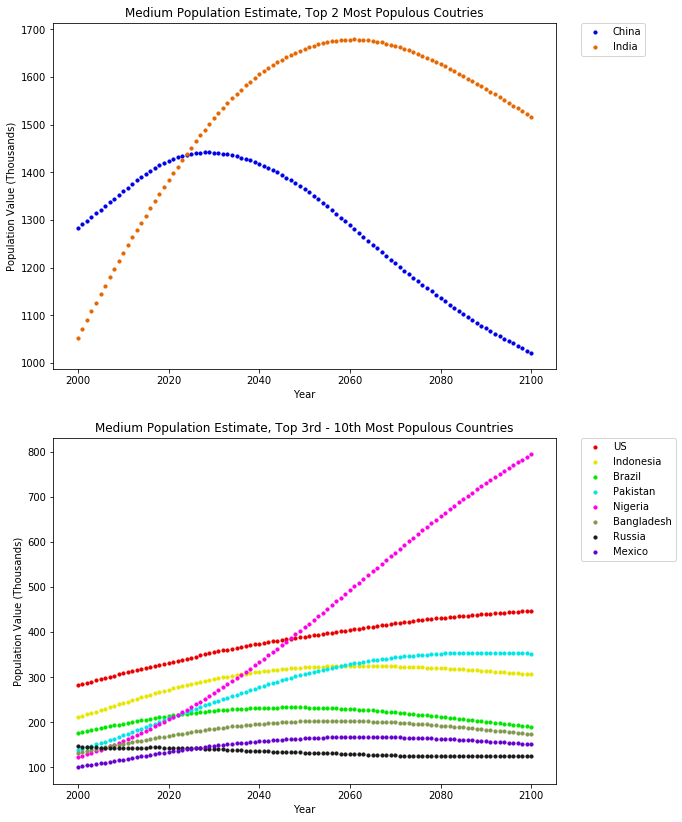

In [12]:
plt.figure(figsize=(9,14))

plt.subplot(2,1,1)
plt.scatter(x=china_pop_med['Year(s)'], y=china_pop_med['Value']/1000, s=10, color=(0.0,0.0,0.9), label='China')
plt.scatter(x=india_pop_med['Year(s)'], y=india_pop_med['Value']/1000, s=10, color=(0.9,0.4,0.0), label='India')
plt.title('Medium Population Estimate, Top 2 Most Populous Coutries')
plt.xlabel('Year')
plt.ylabel('Population Value (Thousands)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.subplot(2,1,2)
plt.scatter(x=us_pop_med['Year(s)'], y=us_pop_med['Value']/1000, s=10, color=(0.9,0.0,0.0), label='US')
plt.scatter(x=indonesia_pop_med['Year(s)'], y=indonesia_pop_med['Value']/1000, s=10, color=(0.9,0.9,0.0), label='Indonesia')
plt.scatter(x=brazil_pop_med['Year(s)'], y=brazil_pop_med['Value']/1000, s=10, color=(0.0,0.9,0.0), label='Brazil')
plt.scatter(x=paki_pop_med['Year(s)'], y=paki_pop_med['Value']/1000, s=10, color=(0.0,0.9,0.9), label='Pakistan')
plt.scatter(x=nigeria_pop_med['Year(s)'], y=nigeria_pop_med['Value']/1000, s=10, color=(1,0.0,0.9), label='Nigeria')
plt.scatter(x=bang_pop_med['Year(s)'], y=bang_pop_med['Value']/1000, s=10, color=(0.5,0.6,0.3), label='Bangladesh')
plt.scatter(x=russia_pop_med['Year(s)'], y=russia_pop_med['Value']/1000, s=10, color=(0.1,0.1,0.1), label='Russia')
plt.scatter(x=mexico_pop_med['Year(s)'], y=mexico_pop_med['Value']/1000, s=10, color=(0.4,0.0,0.8), label='Mexico')
plt.title('Medium Population Estimate, Top 3rd - 10th Most Populous Countries')
plt.xlabel('Year')
plt.ylabel('Population Value (Thousands)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

These 2 graphs are much more useful than our original 2 as we can get much more detail about how the population estimates interact with one another.  

Now that we can better see the data, we can tell these are definitely complicated and thought out estimates. Each country has its own unique trend that takes more into account more than just the current rate of population growth but also each country's unique culture and geography.

Remember, this graph only used the medium population prediction variant. Let's take a look at what the other prediction variants. To keep our visualization simple, let's just look at the 2 most populous countries: China and Inida.

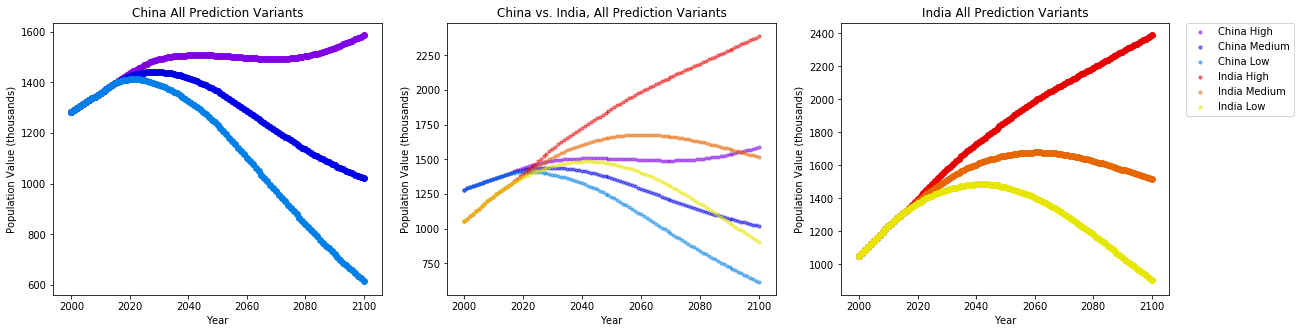

In [13]:
china_pop_high = china_pop[china_pop['Variant']=='High']
india_pop_high = india_pop[india_pop['Variant']=='High']
china_pop_low = china_pop[china_pop['Variant']=='Low']
india_pop_low = india_pop[india_pop['Variant']=='Low']

plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.scatter(x=china_pop_high['Year(s)'], y=china_pop_high['Value']/1000,color=(0.5,0.0,0.9), label='China High') 
plt.scatter(x=china_pop_med['Year(s)'], y=china_pop_med['Value']/1000,color=(0.0,0.0,0.9), label='China Medium') 
plt.scatter(x=china_pop_low['Year(s)'], y=china_pop_low['Value']/1000,color=(0.0,0.5,0.9), label='China Low') 
plt.title('China All Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Population Value (thousands)')

plt.subplot(1,3,2)
plt.scatter(x=china_pop_high['Year(s)'], y=china_pop_high['Value']/1000,color=(0.5,0.0,0.9), alpha=0.5, label='China High', s=10) 
plt.scatter(x=china_pop_med['Year(s)'], y=china_pop_med['Value']/1000,color=(0.0,0.0,0.9), alpha=0.5, label='China Medium', s=10) 
plt.scatter(x=china_pop_low['Year(s)'], y=china_pop_low['Value']/1000,color=(0.0,0.5,0.9), alpha=0.5, label='China Low', s=10)
plt.scatter(x=india_pop_high['Year(s)'], y=india_pop_high['Value']/1000,color=(0.9,0.0,0.0), alpha=0.5, label='India High', s=10) 
plt.scatter(x=india_pop_med['Year(s)'], y=india_pop_med['Value']/1000,color=(0.9,0.4,0.0), alpha=0.5, label='India Medium', s=10) 
plt.scatter(x=india_pop_low['Year(s)'], y=india_pop_low['Value']/1000,color=(0.9,0.9,0.0), alpha=0.5, label='India Low', s=10) 
plt.title('China vs. India, All Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Population Value (thousands)')
plt.legend(bbox_to_anchor=(2.25, 1), loc=2, borderaxespad=0.)

plt.subplot(1,3,3)
plt.scatter(x=india_pop_high['Year(s)'], y=india_pop_high['Value']/1000,color=(0.9,0.0,0.0), label='India High') 
plt.scatter(x=india_pop_med['Year(s)'], y=india_pop_med['Value']/1000,color=(0.9,0.4,0.0), label='India Medium') 
plt.scatter(x=india_pop_low['Year(s)'], y=india_pop_low['Value']/1000,color=(0.9,0.9,0.0), label='India Low') 
plt.title('India All Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Population Value (thousands)')

plt.show()

In [14]:
#play with the alpha

As we can now see, the high and low variant predictions are not just the same curve as the medium with a different scaling factor, they have very different curves and trends. Note that the values from 2017 and before are the same for all prediction variants, since that data is recorded and not a prediction. 

At the left, we can see China's predictions. In its medium and low predctions, China's population is expected to follow similar trends, increasing for a bit, then peaking and drastically falling, going far below China's 2017 population in 2100. In its high prediction, China is expeced to increase overall slightly, only increasing by about 20% of its 2017 value by 2100.

On the right, we can see India's prediction. In it's low prediction, India is expected to increase, peak, then decrease sharply, falling below its 2017 value by 2100. The medium prediction is expected to follow a similar pattern, but much more muted, not even falling below it'scurrent population value by the end of the century. In its high prediction, India's population is expected to skyrocket, drastically increasing over the next century, increasing by about 90% of its 2017 value by the end of the century.

In the center graph, we can truly see how the 2 predictions interact. India's overall growth is expected to be much greater than China's. In fact, India's low and medium prediction have similar values to China's medium and high predictions respectively. 

China starts with a greater population and has more space than India. What might explain this huge difference in growth? What could be making China's population so much more likely to plummit?

Let's look at our population data through the lense of sex.

## Sex Differences


China starts with a higher population, a stronger economy, and more land in their country than India. So what might explain this huge difference in growth? What could be making China's population so much more likely to plummit?

Let's see if we can find the answer looking at our population data divided by the 2 sexes.

Let's create high, medium, and low prediction variant data frames for China's and India's male and female population data, similar to before.

In [15]:
china_pop_f = world_pop_f[world_pop_f['Country or Area']=='China']
china_pop_m = world_pop_m[world_pop_m['Country or Area']=='China']

china_pop_f_high = china_pop_f[china_pop_f['Variant']=='High']
china_pop_m_high = china_pop_m[china_pop_m['Variant']=='High']
china_pop_f_med = china_pop_f[china_pop_f['Variant']=='Medium']
china_pop_m_med = china_pop_m[china_pop_m['Variant']=='Medium']
china_pop_f_low = china_pop_f[china_pop_f['Variant']=='Low']
china_pop_m_low = china_pop_m[china_pop_m['Variant']=='Low']

india_pop_f = world_pop_f[world_pop_f['Country or Area']=='India']
india_pop_m = world_pop_m[world_pop_m['Country or Area']=='India']

india_pop_f_high = india_pop_f[india_pop_f['Variant']=='High']
india_pop_m_high = india_pop_m[india_pop_m['Variant']=='High']
india_pop_f_med = india_pop_f[india_pop_f['Variant']=='Medium']
india_pop_m_med = india_pop_m[india_pop_m['Variant']=='Medium']
india_pop_f_low = india_pop_f[india_pop_f['Variant']=='Low']
india_pop_m_low = india_pop_m[india_pop_m['Variant']=='Low']


Now let's plot our data frames. We will plot 2 sets of graphs: 3 comparing China's male and female data and 3 comparing India's male and female data, similar to the previous layout.

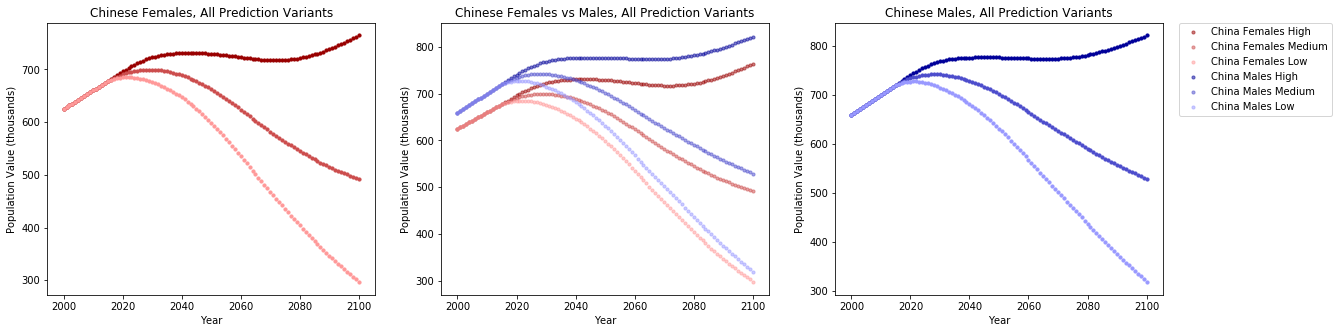

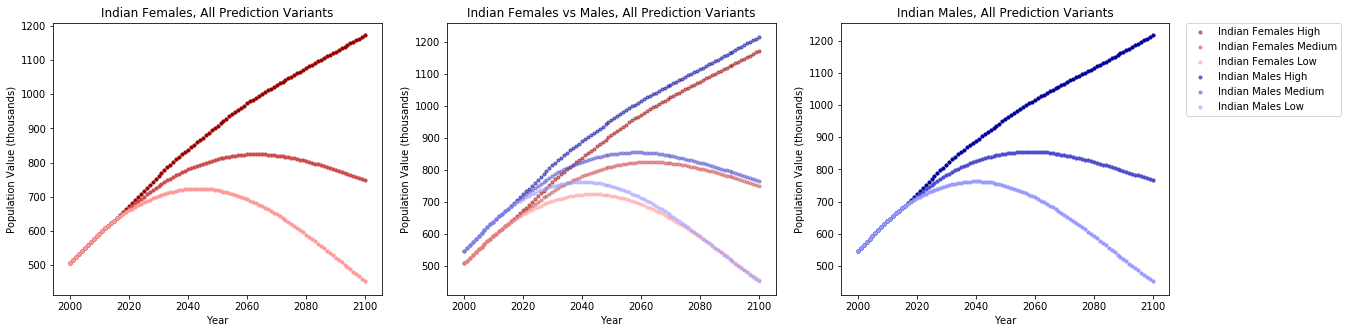

In [16]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.scatter(x=china_pop_f_high['Year(s)'], y=china_pop_f_high['Value']/1000,color=(0.6,0.0,0.0), label='China Females High', s=10) 
plt.scatter(x=china_pop_f_med['Year(s)'], y=china_pop_f_med['Value']/1000,color=(0.8,0.3,0.3), label='China Females Medium', s=10) 
plt.scatter(x=china_pop_f_low['Year(s)'], y=china_pop_f_low['Value']/1000,color=(1.0,0.6,0.6), label='China Females Low', s=10) 
plt.title('Chinese Females, All Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Population Value (thousands)')

plt.subplot(1,3,2)
plt.scatter(x=china_pop_f_high['Year(s)'], y=china_pop_f_high['Value']/1000,color=(0.6,0.0,0.0), alpha=0.5, label='China Females High', s=10) 
plt.scatter(x=china_pop_f_med['Year(s)'], y=china_pop_f_med['Value']/1000,color=(0.8,0.3,0.3), alpha=0.5, label='China Females Medium', s=10) 
plt.scatter(x=china_pop_f_low['Year(s)'], y=china_pop_f_low['Value']/1000,color=(1.0,0.6,0.6), alpha=0.5, label='China Females Low', s=10) 
plt.scatter(x=china_pop_m_high['Year(s)'], y=china_pop_m_high['Value']/1000,color=(0.0,0.0,0.6), alpha=0.5, label='China Males High', s=10) 
plt.scatter(x=china_pop_m_med['Year(s)'], y=china_pop_m_med['Value']/1000,color=(0.3,0.3,0.8), alpha=0.5, label='China Males Medium', s=10) 
plt.scatter(x=china_pop_m_low['Year(s)'], y=china_pop_m_low['Value']/1000,color=(0.6,0.6,1.0), alpha=0.5, label='China Males Low', s=10) 
plt.title('Chinese Females vs Males, All Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Population Value (thousands)')
plt.legend(bbox_to_anchor=(2.25, 1), loc=2, borderaxespad=0.)

plt.subplot(1,3,3)
plt.scatter(x=china_pop_m_high['Year(s)'], y=china_pop_m_high['Value']/1000,color=(0.0,0.0,0.6), label='China Males High', s=10) 
plt.scatter(x=china_pop_m_med['Year(s)'], y=china_pop_m_med['Value']/1000,color=(0.3,0.3,0.8), label='China Males Medium',s=10) 
plt.scatter(x=china_pop_m_low['Year(s)'], y=china_pop_m_low['Value']/1000,color=(0.6,0.6,1.0), label='China Males Low',s=10)
plt.title('Chinese Males, All Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Population Value (thousands)')

plt.show()

plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.scatter(x=india_pop_f_high['Year(s)'], y=india_pop_f_high['Value']/1000,color=(0.6,0.0,0.0), label='Indian Females High', s=10) 
plt.scatter(x=india_pop_f_med['Year(s)'], y=india_pop_f_med['Value']/1000,color=(0.8,0.3,0.3), label='Indian Females Medium', s=10) 
plt.scatter(x=india_pop_f_low['Year(s)'], y=india_pop_f_low['Value']/1000,color=(1.0,0.6,0.6), label='Indian Females Low', s=10) 
plt.title('Indian Females, All Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Population Value (thousands)')

plt.subplot(1,3,2)
plt.scatter(x=india_pop_f_high['Year(s)'], y=india_pop_f_high['Value']/1000,color=(0.6,0.0,0.0), alpha=0.5, label='Indian Females High', s=10) 
plt.scatter(x=india_pop_f_med['Year(s)'], y=india_pop_f_med['Value']/1000,color=(0.8,0.3,0.3), alpha=0.5, label='Indian Females Medium', s=10) 
plt.scatter(x=india_pop_f_low['Year(s)'], y=india_pop_f_low['Value']/1000,color=(1.0,0.6,0.6), alpha=0.5, label='Indian Females Low', s=10) 
plt.scatter(x=india_pop_m_high['Year(s)'], y=india_pop_m_high['Value']/1000,color=(0.0,0.0,0.6), alpha=0.5, label='Indian Males High', s=10) 
plt.scatter(x=india_pop_m_med['Year(s)'], y=india_pop_m_med['Value']/1000,color=(0.3,0.3,0.8), alpha=0.5, label='Indian Males Medium', s=10) 
plt.scatter(x=india_pop_m_low['Year(s)'], y=india_pop_m_low['Value']/1000,color=(0.6,0.6,1.0), alpha=0.5, label='Indian Males Low', s=10) 
plt.title('Indian Females vs Males, All Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Population Value (thousands)')
plt.legend(bbox_to_anchor=(2.25, 1), loc=2, borderaxespad=0.)

plt.subplot(1,3,3)
plt.scatter(x=india_pop_m_high['Year(s)'], y=india_pop_m_high['Value']/1000,color=(0.0,0.0,0.6), label='Indian Males High', s=10) 
plt.scatter(x=india_pop_m_med['Year(s)'], y=india_pop_m_med['Value']/1000,color=(0.3,0.3,0.8), label='Indian Males Medium',s=10) 
plt.scatter(x=india_pop_m_low['Year(s)'], y=india_pop_m_low['Value']/1000,color=(0.6,0.6,1.0), label='Indian Males Low',s=10)
plt.title('Indian Males, All Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Population Value (thousands)')

plt.show()

We can now see the male and female population predictions of all prediction variants side by side. Both countries definitely have a visibile difference in population, but China seems to have a greater difference than India does, though it's somewhat hard to tell. 

Let's see if we can take a closer look at the difference. We'll zoom in on the 2 middle column graphs of each sex's population side by side and see if we can get a better view of the difference.

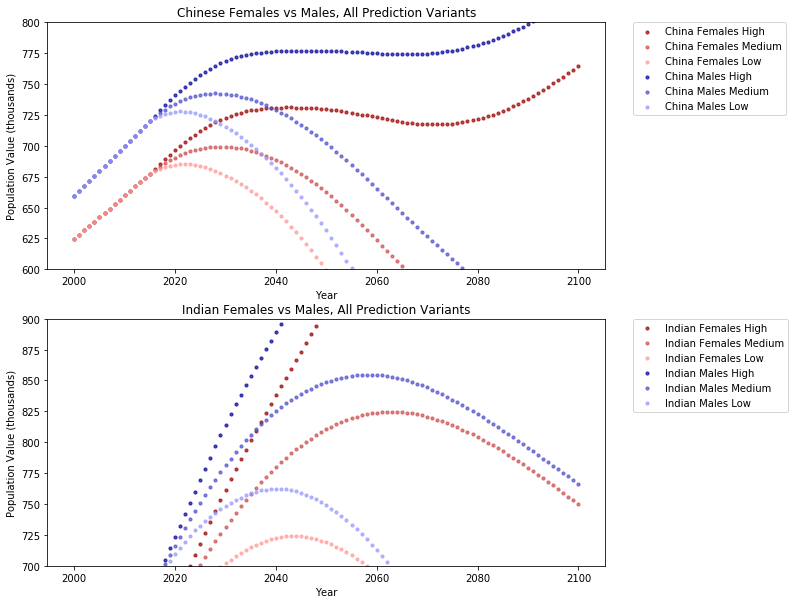

In [17]:
plt.figure(figsize=(10,10))

plt.subplot(2,1,1)
plt.scatter(x=china_pop_f_high['Year(s)'], y=china_pop_f_high['Value']/1000,color=(0.6,0.0,0.0), alpha=0.7, label='China Females High', s=10) 
plt.scatter(x=china_pop_f_med['Year(s)'], y=china_pop_f_med['Value']/1000,color=(0.8,0.3,0.3), alpha=0.7, label='China Females Medium', s=10) 
plt.scatter(x=china_pop_f_low['Year(s)'], y=china_pop_f_low['Value']/1000,color=(1.0,0.6,0.6), alpha=0.7, label='China Females Low', s=10) 
plt.scatter(x=china_pop_m_high['Year(s)'], y=china_pop_m_high['Value']/1000,color=(0.0,0.0,0.6), alpha=0.7, label='China Males High', s=10) 
plt.scatter(x=china_pop_m_med['Year(s)'], y=china_pop_m_med['Value']/1000,color=(0.3,0.3,0.8), alpha=0.7, label='China Males Medium', s=10) 
plt.scatter(x=china_pop_m_low['Year(s)'], y=china_pop_m_low['Value']/1000,color=(0.6,0.6,1.0), alpha=0.7, label='China Males Low', s=10) 
plt.title('Chinese Females vs Males, All Prediction Variants')
plt.ylim(600,800)
plt.xlabel('Year')
plt.ylabel('Population Value (thousands)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.subplot(2,1,2)
plt.scatter(x=india_pop_f_high['Year(s)'], y=india_pop_f_high['Value']/1000,color=(0.6,0.0,0.0), alpha=0.7, label='Indian Females High', s=10) 
plt.scatter(x=india_pop_f_med['Year(s)'], y=india_pop_f_med['Value']/1000,color=(0.8,0.3,0.3), alpha=0.7, label='Indian Females Medium', s=10) 
plt.scatter(x=india_pop_f_low['Year(s)'], y=india_pop_f_low['Value']/1000,color=(1.0,0.6,0.6), alpha=0.7, label='Indian Females Low', s=10) 
plt.scatter(x=india_pop_m_high['Year(s)'], y=india_pop_m_high['Value']/1000,color=(0.0,0.0,0.6), alpha=0.7, label='Indian Males High', s=10) 
plt.scatter(x=india_pop_m_med['Year(s)'], y=india_pop_m_med['Value']/1000,color=(0.3,0.3,0.8), alpha=0.7, label='Indian Males Medium', s=10) 
plt.scatter(x=india_pop_m_low['Year(s)'], y=india_pop_m_low['Value']/1000,color=(0.6,0.6,1.0), alpha=0.7, label='Indian Males Low', s=10) 
plt.title('Indian Females vs Males, All Prediction Variants')
plt.ylim(700,900)
plt.xlabel('Year')
plt.ylabel('Population Value (thousands)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

Now that we've zoomed in on our graph, we can see that China does indeed have a higher population difference, but not by really by much. It's still hard to really visualize the difference.

Let's add another column to our female and male world population data sets, called "Difference." This column will contain values equal to the difference between the male and female populations of that particular country, year, and prediction variant. In the female data set, the value will be equal to the female population minus the male population, and vice versa in the male data set. So this column's sign will change between the 2, but not the absolute value.

In [18]:
world_pop_f['Difference'] = world_pop_f['Value'] - world_pop_m['Value']
world_pop_m['Difference'] = world_pop_m['Value'] - world_pop_f['Value']

Of course, it will not be too valuable when comparing the sex differences betweeen populations of 2 different sizes. So let's create another column in both the female and male population data sets called "Relative Difference". This column will contain the gender difference relative to the total population value: the value in the respective "Difference" column of the female and male data sets divided by the country's total population of that prediction variant and year.

In [19]:
world_pop_f['Relative Difference'] = world_pop_f['Difference']/world_pop['Value']
world_pop_m['Relative Difference'] = world_pop_m['Difference']/world_pop['Value']

Now let's rerun the code creating the China and India sexed data sets of each prediction variant and make sure they've changed to include our new columns.

In [20]:
#recreate the China male and female mixed variant data set
china_pop_f = world_pop_f[world_pop_f['Country or Area']=='China']
china_pop_m = world_pop_m[world_pop_m['Country or Area']=='China']

china_pop_f_high = china_pop_f[china_pop_f['Variant']=='High']
china_pop_m_high = china_pop_m[china_pop_m['Variant']=='High']
china_pop_f_med = china_pop_f[china_pop_f['Variant']=='Medium']
china_pop_m_med = china_pop_m[china_pop_m['Variant']=='Medium']
china_pop_f_low = china_pop_f[china_pop_f['Variant']=='Low']
china_pop_m_low = china_pop_m[china_pop_m['Variant']=='Low']

#recreate the China male and female mixed variant data set
india_pop_f = world_pop_f[world_pop_f['Country or Area']=='India']
india_pop_m = world_pop_m[world_pop_m['Country or Area']=='India']

india_pop_f_high = india_pop_f[india_pop_f['Variant']=='High']
india_pop_m_high = india_pop_m[india_pop_m['Variant']=='High']
india_pop_f_med = india_pop_f[india_pop_f['Variant']=='Medium']
india_pop_m_med = india_pop_m[india_pop_m['Variant']=='Medium']
india_pop_f_low = india_pop_f[india_pop_f['Variant']=='Low']
india_pop_m_low = india_pop_m[india_pop_m['Variant']=='Low']

china_pop_f_high

,Country or Area,Year(s),Variant,Value,Difference,Relative Difference
14848,China,2100,High,764418.040,-57434.784,-0.036207
14851,China,2099,High,761614.801,-57829.029,-0.036576
14854,China,2098,High,758815.005,-58208.838,-0.036938
14857,China,2097,High,756031.721,-58574.060,-0.037293
14860,China,2096,High,753277.889,-58923.475,-0.037639
14863,China,2095,High,750566.251,-59254.841,-0.037974
14866,China,2094,High,747909.433,-59564.773,-0.038296
14869,China,2093,High,745319.929,-59848.846,-0.038600
14872,China,2092,High,742809.909,-60101.820,-0.038883
14875,China,2091,High,740391.026,-60318.072,-0.039140


Perfect. Now let's plot the Chinese and Indian relative sex difference side by side. Remember, the population sex difference data will come from our male data set, so it will be the value of the male population minus the female population divided by the total population. This means that a positive value will indicate more males and a negative value will indicate more females. For instance, a value of -3 on the y-axis would mean that the amount that females outnumber males is equal to 3% of that country's total population.

We will adjust the vertical range to be the same for both graphs for a better comparason. We will also put a horizontal red at 0 on the y-axis to better visualize and understand the relative sex difference.

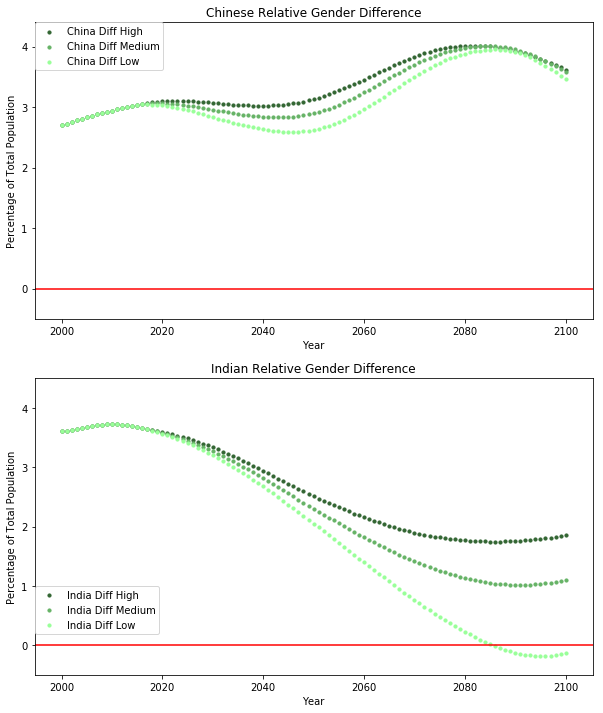

In [21]:
plt.figure(figsize=(10,12))
           
plt.subplot(2,1,1)
plt.scatter(x=china_pop_m_high['Year(s)'], y=china_pop_m_high['Relative Difference']*100,color=(0.2,0.4,0.2), label='China Diff High', s=10) 
plt.scatter(x=china_pop_m_med['Year(s)'], y=china_pop_m_med['Relative Difference']*100,color=(0.4,0.7,0.4), label='China Diff Medium', s=10) 
plt.scatter(x=china_pop_m_low['Year(s)'], y=china_pop_m_low['Relative Difference']*100,color=(0.6,1,0.6), label='China Diff Low', s=10) 
plt.title('Chinese Relative Gender Difference')
plt.xlabel('Year')
plt.ylabel('Percentage of Total Population')
plt.ylim(-0.5,4.4)
plt.axhline(y=0, color='r', linestyle='-')
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)

plt.subplot(2,1,2)
plt.scatter(x=india_pop_m_high['Year(s)'], y=india_pop_m_high['Relative Difference']*100,color=(0.2,0.4,0.2), label='India Diff High', s=10) 
plt.scatter(x=india_pop_m_med['Year(s)'], y=india_pop_m_med['Relative Difference']*100,color=(0.4,0.7,0.4), label='India Diff Medium', s=10) 
plt.scatter(x=india_pop_m_low['Year(s)'], y=india_pop_m_low['Relative Difference']*100,color=(0.6,1,0.6), label='India Diff Low', s=10) 
plt.title('Indian Relative Gender Difference')
plt.xlabel('Year')
plt.ylabel('Percentage of Total Population')
plt.ylim(-0.5,4.5)
plt.axhline(y=0, color='r', linestyle='-')
plt.legend(bbox_to_anchor=(0, 0.3), loc=2, borderaxespad=0.)

plt.show()

Now that we can visualize both country's realive difference, we can compare each country's difference without the bias of population size.

Interestingly, both counties start out at a very similar relative sex difference, in fact, India has a greater sex difference than China does. However, China's relative population difference increases slightly over times accross all prediction variants, converging at around the same relative difference accross all 3 variants. On the other hand, India's relative sex difference decreases greatly over time accross all prediction variants. Interestingly, India's population has the greatest amount of sex difference in the high prediction variant, and the lowest difference in the low prediction variant. In fact, in it's low prediction variant, there begin to be more females than males by the end of the century.

Let's see look at the sex differences of other countries and see if there are any trends. Let's add the rest of the top 10 population countries to our graph.

To start, let's create and recreate all the needed data sets.

In [22]:
#Create separate data frames for each country's mixed sex population prediction
#Create separate data frames for each population prediction variant
#United States
us_pop = world_pop[world_pop['Country or Area']=='United States of America']

us_pop_high = us_pop[us_pop['Variant']=='High']
us_pop_med = us_pop[us_pop['Variant']=='Medium']
us_pop_low = us_pop[us_pop['Variant']=='Low']

#Indonesia
indonesia_pop = world_pop[world_pop['Country or Area']=='Indonesia']

indonesia_pop_high = indonesia_pop[indonesia_pop['Variant']=='High']
indonesia_pop_med = indonesia_pop[indonesia_pop['Variant']=='Medium']
indonesia_pop_low = indonesia_pop[indonesia_pop['Variant']=='Low']

#Brazil
brazil_pop = world_pop[world_pop['Country or Area']=='Brazil']

brazil_pop_high = brazil_pop[brazil_pop['Variant']=='High']
brazil_pop_med = brazil_pop[brazil_pop['Variant']=='Medium']
brazil_pop_low = brazil_pop[brazil_pop['Variant']=='Low']

#Pakistan
paki_pop = world_pop[world_pop['Country or Area']=='Pakistan']

paki_pop_high = paki_pop[paki_pop['Variant']=='High']
paki_pop_med = paki_pop[paki_pop['Variant']=='Medium']
paki_pop_low = paki_pop[paki_pop['Variant']=='Low']

#Nigeria
nigeria_pop = world_pop[world_pop['Country or Area']=='Nigeria']

nigeria_pop_high = nigeria_pop[nigeria_pop['Variant']=='High']
nigeria_pop_med = nigeria_pop[nigeria_pop['Variant']=='Medium']
nigeria_pop_low = nigeria_pop[nigeria_pop['Variant']=='Low']

#Bangladesh
bang_pop = world_pop[world_pop['Country or Area']=='Bangladesh']

bang_pop_high = bang_pop[bang_pop['Variant']=='High']
bang_pop_med = bang_pop[bang_pop['Variant']=='Medium']
bang_pop_low = bang_pop[bang_pop['Variant']=='Low']

#Russia
russia_pop = world_pop[world_pop['Country or Area']=='Russian Federation']

russia_pop_high = russia_pop[russia_pop['Variant']=='High']
russia_pop_med = russia_pop[russia_pop['Variant']=='Medium']
russia_pop_low = russia_pop[russia_pop['Variant']=='Low']

#Mexico
mexico_pop = world_pop[world_pop['Country or Area']=='Mexico']

mexico_pop_high = mexico_pop[mexico_pop['Variant']=='High']
mexico_pop_med = mexico_pop[mexico_pop['Variant']=='Medium']
mexico_pop_low = mexico_pop[mexico_pop['Variant']=='Low']

In [23]:
#Create separate data frames for each country's female and male population prediction respectively
#Create separate data frames for each sex's population prediction variant
#The United States
us_pop_f = world_pop_f[world_pop_f['Country or Area']=='United States of America']
us_pop_m = world_pop_m[world_pop_m['Country or Area']=='United States of America']

us_pop_f_high = us_pop_f[us_pop_f['Variant']=='High']
us_pop_m_high = us_pop_m[us_pop_m['Variant']=='High']
us_pop_f_med = us_pop_f[us_pop_f['Variant']=='Medium']
us_pop_m_med = us_pop_m[us_pop_m['Variant']=='Medium']
us_pop_f_low = us_pop_f[us_pop_f['Variant']=='Low']
us_pop_m_low = us_pop_m[us_pop_m['Variant']=='Low']

#Indonesia
indonesia_pop_f = world_pop_f[world_pop_f['Country or Area']=='Indonesia']
indonesia_pop_m = world_pop_m[world_pop_m['Country or Area']=='Indonesia']

indonesia_pop_f_high = indonesia_pop_f[indonesia_pop_f['Variant']=='High']
indonesia_pop_m_high = indonesia_pop_m[indonesia_pop_m['Variant']=='High']
indonesia_pop_f_med = indonesia_pop_f[indonesia_pop_f['Variant']=='Medium']
indonesia_pop_m_med = indonesia_pop_m[indonesia_pop_m['Variant']=='Medium']
indonesia_pop_f_low = indonesia_pop_f[indonesia_pop_f['Variant']=='Low']
indonesia_pop_m_low = indonesia_pop_m[indonesia_pop_m['Variant']=='Low']

#Brazil
brazil_pop_f = world_pop_f[world_pop_f['Country or Area']=='Brazil']
brazil_pop_m = world_pop_m[world_pop_m['Country or Area']=='Brazil']

brazil_pop_f_high = brazil_pop_f[brazil_pop_f['Variant']=='High']
brazil_pop_m_high = brazil_pop_m[brazil_pop_m['Variant']=='High']
brazil_pop_f_med = brazil_pop_f[brazil_pop_f['Variant']=='Medium']
brazil_pop_m_med = brazil_pop_m[brazil_pop_m['Variant']=='Medium']
brazil_pop_f_low = brazil_pop_f[brazil_pop_f['Variant']=='Low']
brazil_pop_m_low = brazil_pop_m[brazil_pop_m['Variant']=='Low']

#Pakistan
paki_pop_f = world_pop_f[world_pop_f['Country or Area']=='Pakistan']
paki_pop_m = world_pop_m[world_pop_m['Country or Area']=='Pakistan']

paki_pop_f_high = paki_pop_f[paki_pop_f['Variant']=='High']
paki_pop_m_high = paki_pop_m[paki_pop_m['Variant']=='High']
paki_pop_f_med = paki_pop_f[paki_pop_f['Variant']=='Medium']
paki_pop_m_med = paki_pop_m[paki_pop_m['Variant']=='Medium']
paki_pop_f_low = paki_pop_f[paki_pop_f['Variant']=='Low']
paki_pop_m_low = paki_pop_m[paki_pop_m['Variant']=='Low']

#Nigeria
nigeria_pop_f = world_pop_f[world_pop_f['Country or Area']=='Nigeria']
nigeria_pop_m = world_pop_m[world_pop_m['Country or Area']=='Nigeria']

nigeria_pop_f_high = nigeria_pop_f[nigeria_pop_f['Variant']=='High']
nigeria_pop_m_high = nigeria_pop_m[nigeria_pop_m['Variant']=='High']
nigeria_pop_f_med = nigeria_pop_f[nigeria_pop_f['Variant']=='Medium']
nigeria_pop_m_med = nigeria_pop_m[nigeria_pop_m['Variant']=='Medium']
nigeria_pop_f_low = nigeria_pop_f[nigeria_pop_f['Variant']=='Low']
nigeria_pop_m_low = nigeria_pop_m[nigeria_pop_m['Variant']=='Low']

#Bangladesh 
bang_pop_f = world_pop_f[world_pop_f['Country or Area']=='Bangladesh']
bang_pop_m = world_pop_m[world_pop_m['Country or Area']=='Bangladesh']

bang_pop_f_high = bang_pop_f[bang_pop_f['Variant']=='High']
bang_pop_m_high = bang_pop_m[bang_pop_m['Variant']=='High']
bang_pop_f_med = bang_pop_f[bang_pop_f['Variant']=='Medium']
bang_pop_m_med = bang_pop_m[bang_pop_m['Variant']=='Medium']
bang_pop_f_low = bang_pop_f[bang_pop_f['Variant']=='Low']
bang_pop_m_low = bang_pop_m[bang_pop_m['Variant']=='Low']

#Russia          
russia_pop_f = world_pop_f[world_pop_f['Country or Area']=='Russian Federation']
russia_pop_m = world_pop_m[world_pop_m['Country or Area']=='Russian Federation']

russia_pop_f_high = russia_pop_f[russia_pop_f['Variant']=='High']
russia_pop_m_high = russia_pop_m[russia_pop_m['Variant']=='High']
russia_pop_f_med = russia_pop_f[russia_pop_f['Variant']=='Medium']
russia_pop_m_med = russia_pop_m[russia_pop_m['Variant']=='Medium']
russia_pop_f_low = russia_pop_f[russia_pop_f['Variant']=='Low']
russia_pop_m_low = russia_pop_m[russia_pop_m['Variant']=='Low']

#Mexico  
mexico_pop_f = world_pop_f[world_pop_f['Country or Area']=='Mexico']
mexico_pop_m = world_pop_m[world_pop_m['Country or Area']=='Mexico']

mexico_pop_f_high = mexico_pop_f[mexico_pop_f['Variant']=='High']
mexico_pop_m_high = mexico_pop_m[mexico_pop_m['Variant']=='High']
mexico_pop_f_med = mexico_pop_f[mexico_pop_f['Variant']=='Medium']
mexico_pop_m_med = mexico_pop_m[mexico_pop_m['Variant']=='Medium']
mexico_pop_f_low = mexico_pop_f[mexico_pop_f['Variant']=='Low']
mexico_pop_m_low = mexico_pop_m[mexico_pop_m['Variant']=='Low']


Now let's run our graphs for each country's relative sex difference and see if we notice any trends. 

Our graphs will be in the same format as before, each country's graph on it's own row.

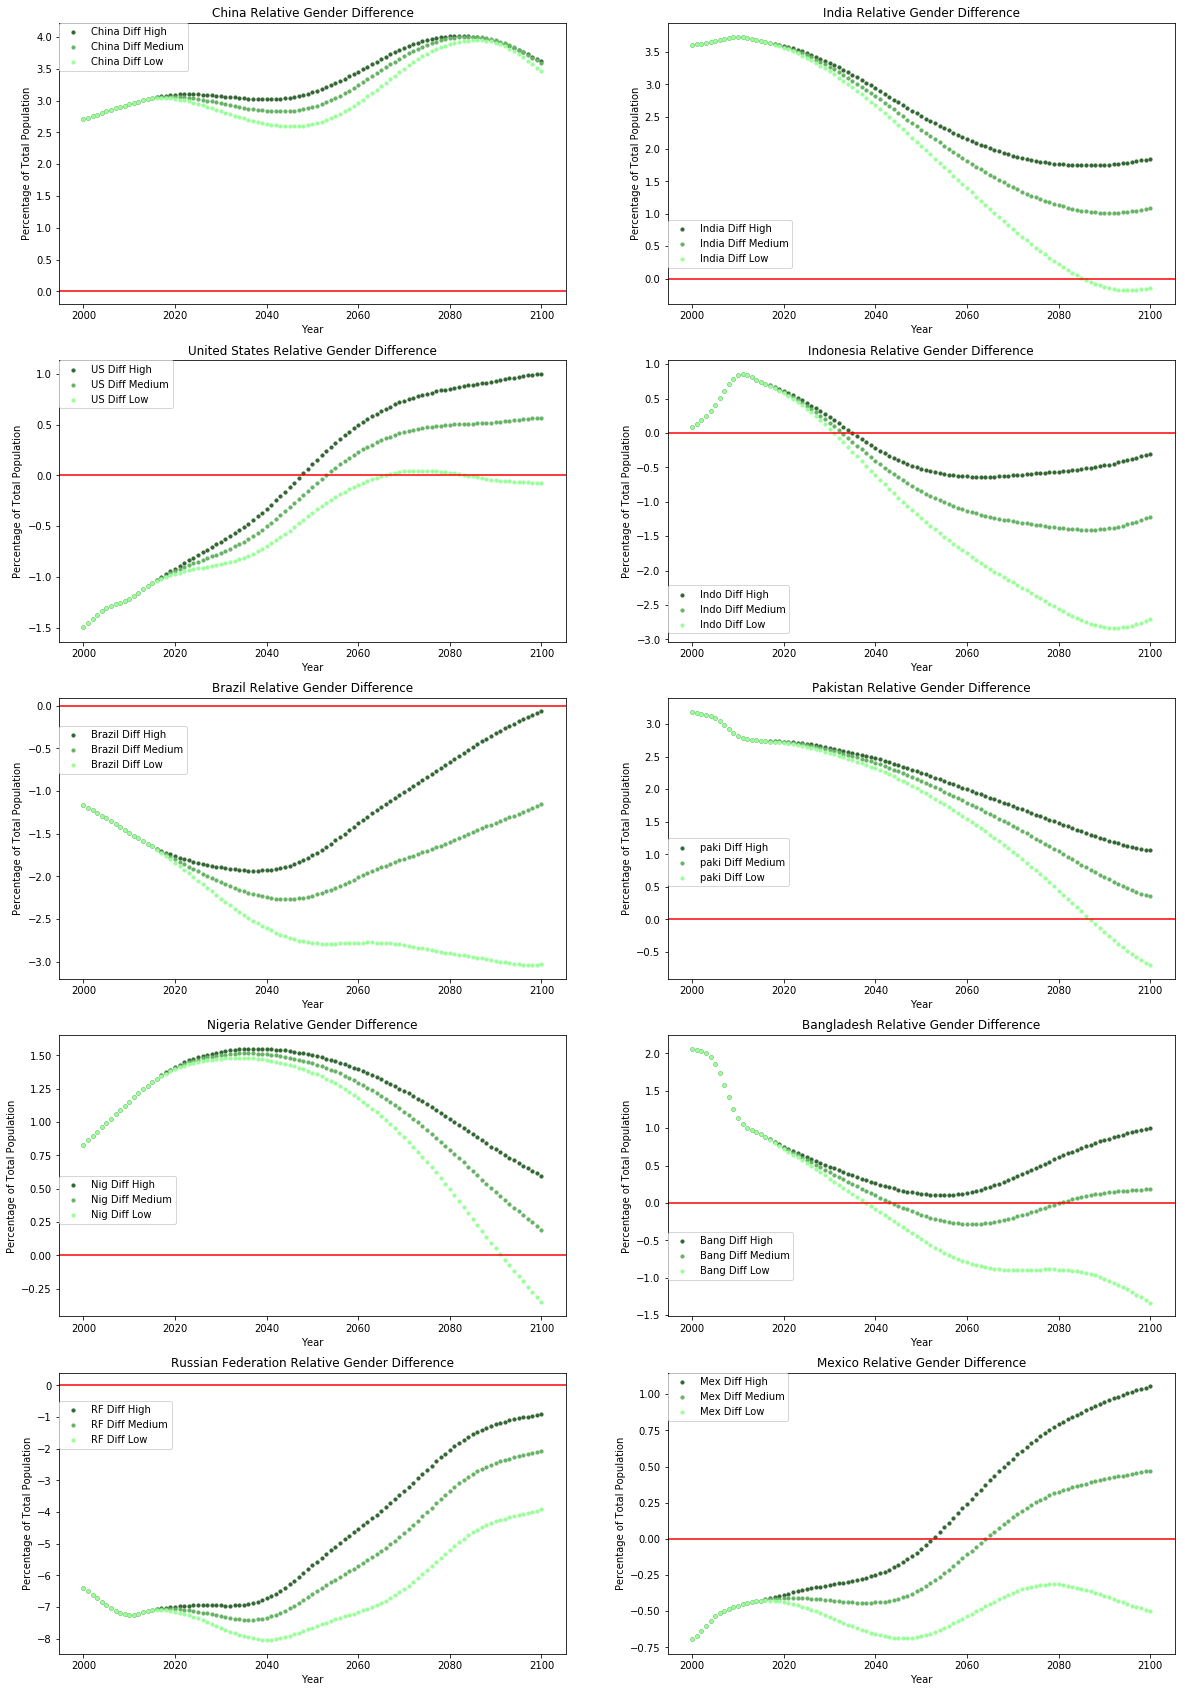

In [24]:
plt.figure(figsize=(20,30))
           
plt.subplot(5,2,1)
plt.scatter(x=china_pop_m_high['Year(s)'], y=china_pop_m_high['Relative Difference']*100,color=(0.2,0.4,0.2), label='China Diff High', s=10) 
plt.scatter(x=china_pop_m_med['Year(s)'], y=china_pop_m_med['Relative Difference']*100,color=(0.4,0.7,0.4), label='China Diff Medium', s=10) 
plt.scatter(x=china_pop_m_low['Year(s)'], y=china_pop_m_low['Relative Difference']*100,color=(0.6,1,0.6), label='China Diff Low', s=10) 
plt.title('China Relative Gender Difference')
plt.xlabel('Year')
plt.ylabel('Percentage of Total Population')
plt.axhline(y=0, color='r', linestyle='-')
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)

plt.subplot(5,2,2)
plt.scatter(x=india_pop_m_high['Year(s)'], y=india_pop_m_high['Relative Difference']*100,color=(0.2,0.4,0.2), label='India Diff High', s=10) 
plt.scatter(x=india_pop_m_med['Year(s)'], y=india_pop_m_med['Relative Difference']*100,color=(0.4,0.7,0.4), label='India Diff Medium', s=10) 
plt.scatter(x=india_pop_m_low['Year(s)'], y=india_pop_m_low['Relative Difference']*100,color=(0.6,1,0.6), label='India Diff Low', s=10) 
plt.title('India Relative Gender Difference')
plt.xlabel('Year')
plt.ylabel('Percentage of Total Population')
plt.axhline(y=0, color='r', linestyle='-')
plt.legend(bbox_to_anchor=(0, 0.3), loc=2, borderaxespad=0.)

plt.subplot(5,2,3)
plt.scatter(x=us_pop_m_high['Year(s)'], y=us_pop_m_high['Relative Difference']*100,color=(0.2,0.4,0.2), label='US Diff High', s=10) 
plt.scatter(x=us_pop_m_med['Year(s)'], y=us_pop_m_med['Relative Difference']*100,color=(0.4,0.7,0.4), label='US Diff Medium', s=10) 
plt.scatter(x=us_pop_m_low['Year(s)'], y=us_pop_m_low['Relative Difference']*100,color=(0.6,1,0.6), label='US Diff Low', s=10) 
plt.title('United States Relative Gender Difference')
plt.xlabel('Year')
plt.ylabel('Percentage of Total Population')
plt.axhline(y=0, color='r', linestyle='-')
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)

plt.subplot(5,2,4)
plt.scatter(x=indonesia_pop_m_high['Year(s)'], y=indonesia_pop_m_high['Relative Difference']*100,color=(0.2,0.4,0.2), label='Indo Diff High', s=10) 
plt.scatter(x=indonesia_pop_m_med['Year(s)'], y=indonesia_pop_m_med['Relative Difference']*100,color=(0.4,0.7,0.4), label='Indo Diff Medium', s=10) 
plt.scatter(x=indonesia_pop_m_low['Year(s)'], y=indonesia_pop_m_low['Relative Difference']*100,color=(0.6,1,0.6), label='Indo Diff Low', s=10) 
plt.title('Indonesia Relative Gender Difference')
plt.xlabel('Year')
plt.ylabel('Percentage of Total Population')
plt.axhline(y=0, color='r', linestyle='-')
plt.legend(bbox_to_anchor=(0, 0.2), loc=2, borderaxespad=0.)

plt.subplot(5,2,5)
plt.scatter(x=brazil_pop_m_high['Year(s)'], y=brazil_pop_m_high['Relative Difference']*100,color=(0.2,0.4,0.2), label='Brazil Diff High', s=10) 
plt.scatter(x=brazil_pop_m_med['Year(s)'], y=brazil_pop_m_med['Relative Difference']*100,color=(0.4,0.7,0.4), label='Brazil Diff Medium', s=10) 
plt.scatter(x=brazil_pop_m_low['Year(s)'], y=brazil_pop_m_low['Relative Difference']*100,color=(0.6,1,0.6), label='Brazil Diff Low', s=10) 
plt.title('Brazil Relative Gender Difference')
plt.xlabel('Year')
plt.ylabel('Percentage of Total Population')
plt.axhline(y=0, color='r', linestyle='-')
plt.legend(bbox_to_anchor=(0, 0.9), loc=2, borderaxespad=0.)

plt.subplot(5,2,6)
plt.scatter(x=paki_pop_m_high['Year(s)'], y=paki_pop_m_high['Relative Difference']*100,color=(0.2,0.4,0.2), label='paki Diff High', s=10) 
plt.scatter(x=paki_pop_m_med['Year(s)'], y=paki_pop_m_med['Relative Difference']*100,color=(0.4,0.7,0.4), label='paki Diff Medium', s=10) 
plt.scatter(x=paki_pop_m_low['Year(s)'], y=paki_pop_m_low['Relative Difference']*100,color=(0.6,1,0.6), label='paki Diff Low', s=10) 
plt.title('Pakistan Relative Gender Difference')
plt.xlabel('Year')
plt.ylabel('Percentage of Total Population')
plt.axhline(y=0, color='r', linestyle='-')
plt.legend(bbox_to_anchor=(0, 0.5), loc=2, borderaxespad=0.)

plt.subplot(5,2,7)
plt.scatter(x=nigeria_pop_m_high['Year(s)'], y=nigeria_pop_m_high['Relative Difference']*100,color=(0.2,0.4,0.2), label='Nig Diff High', s=10) 
plt.scatter(x=nigeria_pop_m_med['Year(s)'], y=nigeria_pop_m_med['Relative Difference']*100,color=(0.4,0.7,0.4), label='Nig Diff Medium', s=10) 
plt.scatter(x=nigeria_pop_m_low['Year(s)'], y=nigeria_pop_m_low['Relative Difference']*100,color=(0.6,1,0.6), label='Nig Diff Low', s=10) 
plt.title('Nigeria Relative Gender Difference')
plt.xlabel('Year')
plt.ylabel('Percentage of Total Population')
plt.axhline(y=0, color='r', linestyle='-')
plt.legend(bbox_to_anchor=(0, 0.5), loc=2, borderaxespad=0.)

plt.subplot(5,2,8)
plt.scatter(x=bang_pop_m_high['Year(s)'], y=bang_pop_m_high['Relative Difference']*100,color=(0.2,0.4,0.2), label='Bang Diff High', s=10) 
plt.scatter(x=bang_pop_m_med['Year(s)'], y=bang_pop_m_med['Relative Difference']*100,color=(0.4,0.7,0.4), label='Bang Diff Medium', s=10) 
plt.scatter(x=bang_pop_m_low['Year(s)'], y=bang_pop_m_low['Relative Difference']*100,color=(0.6,1,0.6), label='Bang Diff Low', s=10) 
plt.title('Bangladesh Relative Gender Difference')
plt.xlabel('Year')
plt.ylabel('Percentage of Total Population')
plt.axhline(y=0, color='r', linestyle='-')
#plt.ylim(-1,4.5)
plt.legend(bbox_to_anchor=(0, 0.3), loc=2, borderaxespad=0.)

plt.subplot(5,2,9)
plt.scatter(x=russia_pop_m_high['Year(s)'], y=russia_pop_m_high['Relative Difference']*100,color=(0.2,0.4,0.2), label='RF Diff High', s=10) 
plt.scatter(x=russia_pop_m_med['Year(s)'], y=russia_pop_m_med['Relative Difference']*100,color=(0.4,0.7,0.4), label='RF Diff Medium', s=10) 
plt.scatter(x=russia_pop_m_low['Year(s)'], y=russia_pop_m_low['Relative Difference']*100,color=(0.6,1,0.6), label='RF Diff Low', s=10) 
plt.title('Russian Federation Relative Gender Difference')
plt.xlabel('Year')
plt.ylabel('Percentage of Total Population')
plt.axhline(y=0, color='r', linestyle='-')
#plt.ylim(-1,4.5)
plt.legend(bbox_to_anchor=(0, 0.9), loc=2, borderaxespad=0.)

plt.subplot(5,2,10)
plt.scatter(x=mexico_pop_m_high['Year(s)'], y=mexico_pop_m_high['Relative Difference']*100,color=(0.2,0.4,0.2), label='Mex Diff High', s=10) 
plt.scatter(x=mexico_pop_m_med['Year(s)'], y=mexico_pop_m_med['Relative Difference']*100,color=(0.4,0.7,0.4), label='Mex Diff Medium', s=10) 
plt.scatter(x=mexico_pop_m_low['Year(s)'], y=mexico_pop_m_low['Relative Difference']*100,color=(0.6,1,0.6), label='Mex Diff Low', s=10) 
plt.title('Mexico Relative Gender Difference')
plt.xlabel('Year')
plt.ylabel('Percentage of Total Population')
plt.axhline(y=0, color='r', linestyle='-')
#plt.ylim(-1,4.5)
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)

plt.show()

From our graphs we can see some very interesting trends. In every single population prediction, the high variant population prediction has the most amount of males. Even when the sex difference is negative, or female dominated accross the board, the high variant prediction will be the closest to neutral. 

Let's add some more countries into our graph and see if this current trend holds. Let's get more prominent counties by focusing on another list: the countries with the biggest ecomonies in the world. When we look at the top 10 world economies, and elimiante countries we've already given separate date frames, this gives us Japan, Germany, The United Kingdom, France, Italy, and Cananda. 

Let's create similar seperate data frames for our missing countries.

In [25]:
#set up data frames for missing top 10 ecomonies, similar to previous data frames
#Japan
japan_pop = world_pop[world_pop['Country or Area']=='Japan']

japan_pop_high = japan_pop[japan_pop['Variant']=='High']
japan_pop_med = japan_pop[japan_pop['Variant']=='Medium']
japan_pop_low = japan_pop[japan_pop['Variant']=='Low']

japan_pop_f = world_pop_f[world_pop_f['Country or Area']=='Japan']
japan_pop_m = world_pop_m[world_pop_m['Country or Area']=='Japan']

japan_pop_f_high = japan_pop_f[japan_pop_f['Variant']=='High']
japan_pop_m_high = japan_pop_m[japan_pop_m['Variant']=='High']
japan_pop_f_med = japan_pop_f[japan_pop_f['Variant']=='Medium']
japan_pop_m_med = japan_pop_m[japan_pop_m['Variant']=='Medium']
japan_pop_f_low = japan_pop_f[japan_pop_f['Variant']=='Low']
japan_pop_m_low = japan_pop_m[japan_pop_m['Variant']=='Low']

#Germany
germany_pop = world_pop[world_pop['Country or Area']=='Germany']

germany_pop_high = germany_pop[germany_pop['Variant']=='High']
germany_pop_med = germany_pop[germany_pop['Variant']=='Medium']
germany_pop_low = germany_pop[germany_pop['Variant']=='Low']

germany_pop_f = world_pop_f[world_pop_f['Country or Area']=='Germany']
germany_pop_m = world_pop_m[world_pop_m['Country or Area']=='Germany']

germany_pop_f_high = germany_pop_f[germany_pop_f['Variant']=='High']
germany_pop_m_high = germany_pop_m[germany_pop_m['Variant']=='High']
germany_pop_f_med = germany_pop_f[germany_pop_f['Variant']=='Medium']
germany_pop_m_med = germany_pop_m[germany_pop_m['Variant']=='Medium']
germany_pop_f_low = germany_pop_f[germany_pop_f['Variant']=='Low']
germany_pop_m_low = germany_pop_m[germany_pop_m['Variant']=='Low']

#United Kingdom
uk_pop = world_pop[world_pop['Country or Area']=='United Kingdom']

uk_pop_high = uk_pop[uk_pop['Variant']=='High']
uk_pop_med = uk_pop[uk_pop['Variant']=='Medium']
uk_pop_low = uk_pop[uk_pop['Variant']=='Low']

uk_pop_f = world_pop_f[world_pop_f['Country or Area']=='United Kingdom']
uk_pop_m = world_pop_m[world_pop_m['Country or Area']=='United Kingdom']

uk_pop_f_high = uk_pop_f[uk_pop_f['Variant']=='High']
uk_pop_m_high = uk_pop_m[uk_pop_m['Variant']=='High']
uk_pop_f_med = uk_pop_f[uk_pop_f['Variant']=='Medium']
uk_pop_m_med = uk_pop_m[uk_pop_m['Variant']=='Medium']
uk_pop_f_low = uk_pop_f[uk_pop_f['Variant']=='Low']
uk_pop_m_low = uk_pop_m[uk_pop_m['Variant']=='Low']

#France
france_pop = world_pop[world_pop['Country or Area']=='France']

france_pop_high = france_pop[france_pop['Variant']=='High']
france_pop_med = france_pop[france_pop['Variant']=='Medium']
france_pop_low = france_pop[france_pop['Variant']=='Low']

france_pop_f = world_pop_f[world_pop_f['Country or Area']=='France']
france_pop_m = world_pop_m[world_pop_m['Country or Area']=='France']

france_pop_f_high = france_pop_f[france_pop_f['Variant']=='High']
france_pop_m_high = france_pop_m[france_pop_m['Variant']=='High']
france_pop_f_med = france_pop_f[france_pop_f['Variant']=='Medium']
france_pop_m_med = france_pop_m[france_pop_m['Variant']=='Medium']
france_pop_f_low = france_pop_f[france_pop_f['Variant']=='Low']
france_pop_m_low = france_pop_m[france_pop_m['Variant']=='Low']

#Italy
italy_pop = world_pop[world_pop['Country or Area']=='Italy']

italy_pop_high = italy_pop[italy_pop['Variant']=='High']
italy_pop_med = italy_pop[italy_pop['Variant']=='Medium']
italy_pop_low = italy_pop[italy_pop['Variant']=='Low']

italy_pop_f = world_pop_f[world_pop_f['Country or Area']=='Italy']
italy_pop_m = world_pop_m[world_pop_m['Country or Area']=='Italy']

italy_pop_f_high = italy_pop_f[italy_pop_f['Variant']=='High']
italy_pop_m_high = italy_pop_m[italy_pop_m['Variant']=='High']
italy_pop_f_med = italy_pop_f[italy_pop_f['Variant']=='Medium']
italy_pop_m_med = italy_pop_m[italy_pop_m['Variant']=='Medium']
italy_pop_f_low = italy_pop_f[italy_pop_f['Variant']=='Low']
italy_pop_m_low = italy_pop_m[italy_pop_m['Variant']=='Low']

#Canada
canada_pop = world_pop[world_pop['Country or Area']=='Canada']

canada_pop_high = canada_pop[canada_pop['Variant']=='High']
canada_pop_med = canada_pop[canada_pop['Variant']=='Medium']
canada_pop_low = canada_pop[canada_pop['Variant']=='Low']

canada_pop_f = world_pop_f[world_pop_f['Country or Area']=='Canada']
canada_pop_m = world_pop_m[world_pop_m['Country or Area']=='Canada']

canada_pop_f_high = canada_pop_f[canada_pop_f['Variant']=='High']
canada_pop_m_high = canada_pop_m[canada_pop_m['Variant']=='High']
canada_pop_f_med = canada_pop_f[canada_pop_f['Variant']=='Medium']
canada_pop_m_med = canada_pop_m[canada_pop_m['Variant']=='Medium']
canada_pop_f_low = canada_pop_f[canada_pop_f['Variant']=='Low']
canada_pop_m_low = canada_pop_m[canada_pop_m['Variant']=='Low']

Now let's add them to our graph and see if our trend holds true.

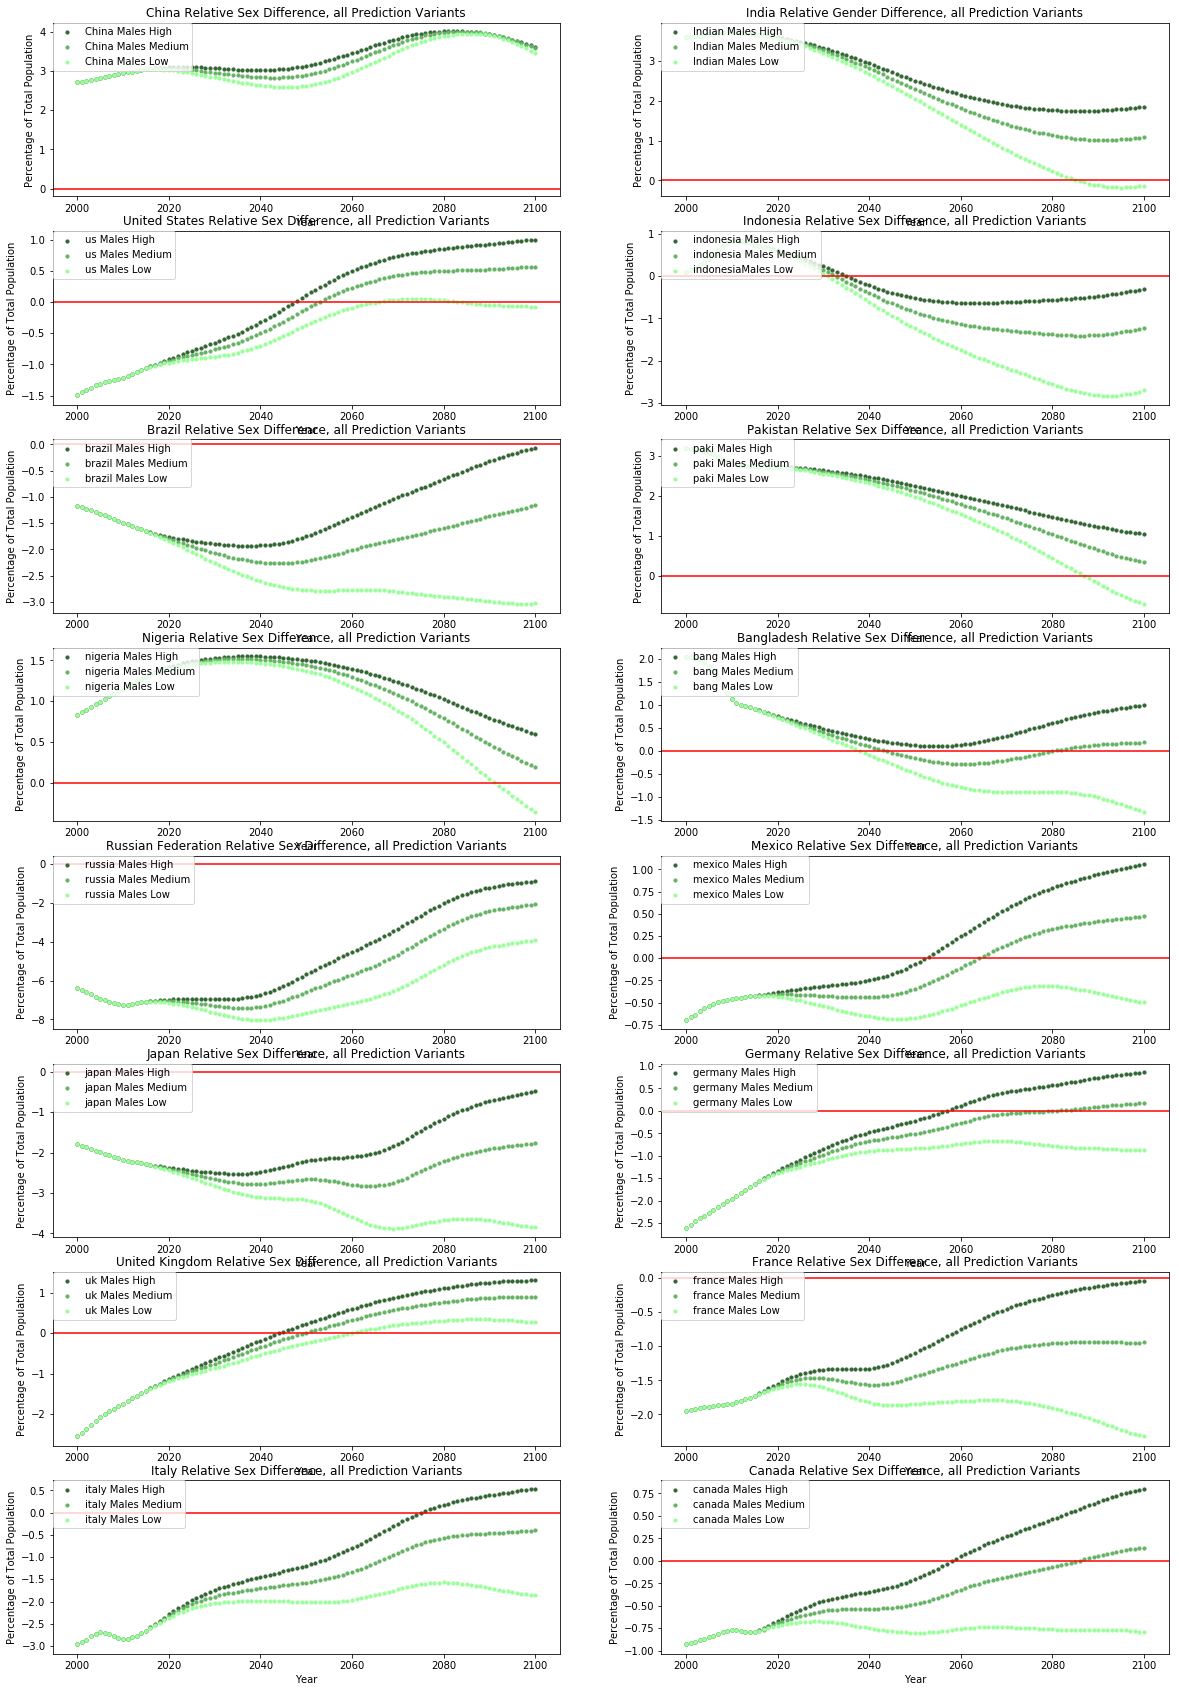

In [26]:
plt.figure(figsize=(20,30))
           
plt.subplot(8,2,1)
plt.scatter(x=china_pop_m_high['Year(s)'], y=china_pop_m_high['Relative Difference']*100,color=(0.2,0.4,0.2), label='China Males High', s=10) 
plt.scatter(x=china_pop_m_med['Year(s)'], y=china_pop_m_med['Relative Difference']*100,color=(0.4,0.7,0.4), label='China Males Medium', s=10) 
plt.scatter(x=china_pop_m_low['Year(s)'], y=china_pop_m_low['Relative Difference']*100,color=(0.6,1,0.6), label='China Males Low', s=10) 
plt.title('China Relative Sex Difference, all Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Percentage of Total Population')
plt.axhline(y=0, color='r', linestyle='-')
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)

plt.subplot(8,2,2)
plt.scatter(x=india_pop_m_high['Year(s)'], y=india_pop_m_high['Relative Difference']*100,color=(0.2,0.4,0.2), label='Indian Males High', s=10) 
plt.scatter(x=india_pop_m_med['Year(s)'], y=india_pop_m_med['Relative Difference']*100,color=(0.4,0.7,0.4), label='Indian Males Medium', s=10) 
plt.scatter(x=india_pop_m_low['Year(s)'], y=india_pop_m_low['Relative Difference']*100,color=(0.6,1,0.6), label='Indian Males Low', s=10) 
plt.title('India Relative Gender Difference, all Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Percentage of Total Population')
plt.axhline(y=0, color='r', linestyle='-')
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)

plt.subplot(8,2,3)
plt.scatter(x=us_pop_m_high['Year(s)'], y=us_pop_m_high['Relative Difference']*100,color=(0.2,0.4,0.2), label='us Males High', s=10) 
plt.scatter(x=us_pop_m_med['Year(s)'], y=us_pop_m_med['Relative Difference']*100,color=(0.4,0.7,0.4), label='us Males Medium', s=10) 
plt.scatter(x=us_pop_m_low['Year(s)'], y=us_pop_m_low['Relative Difference']*100,color=(0.6,1,0.6), label='us Males Low', s=10) 
plt.title('United States Relative Sex Difference, all Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Percentage of Total Population')
plt.axhline(y=0, color='r', linestyle='-')
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)

plt.subplot(8,2,4)
plt.scatter(x=indonesia_pop_m_high['Year(s)'], y=indonesia_pop_m_high['Relative Difference']*100,color=(0.2,0.4,0.2), label='indonesia Males High', s=10) 
plt.scatter(x=indonesia_pop_m_med['Year(s)'], y=indonesia_pop_m_med['Relative Difference']*100,color=(0.4,0.7,0.4), label='indonesia Males Medium', s=10) 
plt.scatter(x=indonesia_pop_m_low['Year(s)'], y=indonesia_pop_m_low['Relative Difference']*100,color=(0.6,1,0.6), label='indonesiaMales Low', s=10) 
plt.title('Indonesia Relative Sex Difference, all Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Percentage of Total Population')
plt.axhline(y=0, color='r', linestyle='-')
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)

plt.subplot(8,2,5)
plt.scatter(x=brazil_pop_m_high['Year(s)'], y=brazil_pop_m_high['Relative Difference']*100,color=(0.2,0.4,0.2), label='brazil Males High', s=10) 
plt.scatter(x=brazil_pop_m_med['Year(s)'], y=brazil_pop_m_med['Relative Difference']*100,color=(0.4,0.7,0.4), label='brazil Males Medium', s=10) 
plt.scatter(x=brazil_pop_m_low['Year(s)'], y=brazil_pop_m_low['Relative Difference']*100,color=(0.6,1,0.6), label='brazil Males Low', s=10) 
plt.title('Brazil Relative Sex Difference, all Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Percentage of Total Population')
plt.axhline(y=0, color='r', linestyle='-')
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)

plt.subplot(8,2,6)
plt.scatter(x=paki_pop_m_high['Year(s)'], y=paki_pop_m_high['Relative Difference']*100,color=(0.2,0.4,0.2), label='paki Males High', s=10) 
plt.scatter(x=paki_pop_m_med['Year(s)'], y=paki_pop_m_med['Relative Difference']*100,color=(0.4,0.7,0.4), label='paki Males Medium', s=10) 
plt.scatter(x=paki_pop_m_low['Year(s)'], y=paki_pop_m_low['Relative Difference']*100,color=(0.6,1,0.6), label='paki Males Low', s=10) 
plt.title('Pakistan Relative Sex Difference, all Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Percentage of Total Population')
plt.axhline(y=0, color='r', linestyle='-')
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)

plt.subplot(8,2,7)
plt.scatter(x=nigeria_pop_m_high['Year(s)'], y=nigeria_pop_m_high['Relative Difference']*100,color=(0.2,0.4,0.2), label='nigeria Males High', s=10) 
plt.scatter(x=nigeria_pop_m_med['Year(s)'], y=nigeria_pop_m_med['Relative Difference']*100,color=(0.4,0.7,0.4), label='nigeria Males Medium', s=10) 
plt.scatter(x=nigeria_pop_m_low['Year(s)'], y=nigeria_pop_m_low['Relative Difference']*100,color=(0.6,1,0.6), label='nigeria Males Low', s=10) 
plt.title('Nigeria Relative Sex Difference, all Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Percentage of Total Population')
plt.axhline(y=0, color='r', linestyle='-')
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)

plt.subplot(8,2,8)
plt.scatter(x=bang_pop_m_high['Year(s)'], y=bang_pop_m_high['Relative Difference']*100,color=(0.2,0.4,0.2), label='bang Males High', s=10) 
plt.scatter(x=bang_pop_m_med['Year(s)'], y=bang_pop_m_med['Relative Difference']*100,color=(0.4,0.7,0.4), label='bang Males Medium', s=10) 
plt.scatter(x=bang_pop_m_low['Year(s)'], y=bang_pop_m_low['Relative Difference']*100,color=(0.6,1,0.6), label='bang Males Low', s=10) 
plt.title('Bangladesh Relative Sex Difference, all Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Percentage of Total Population')
plt.axhline(y=0, color='r', linestyle='-')
#plt.ylim(-1,4.5)
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)

plt.subplot(8,2,9)
plt.scatter(x=russia_pop_m_high['Year(s)'], y=russia_pop_m_high['Relative Difference']*100,color=(0.2,0.4,0.2), label='russia Males High', s=10) 
plt.scatter(x=russia_pop_m_med['Year(s)'], y=russia_pop_m_med['Relative Difference']*100,color=(0.4,0.7,0.4), label='russia Males Medium', s=10) 
plt.scatter(x=russia_pop_m_low['Year(s)'], y=russia_pop_m_low['Relative Difference']*100,color=(0.6,1,0.6), label='russia Males Low', s=10) 
plt.title('Russian Federation Relative Sex Difference, all Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Percentage of Total Population')
plt.axhline(y=0, color='r', linestyle='-')
#plt.ylim(-1,4.5)
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)

plt.subplot(8,2,10)
plt.scatter(x=mexico_pop_m_high['Year(s)'], y=mexico_pop_m_high['Relative Difference']*100,color=(0.2,0.4,0.2), label='mexico Males High', s=10) 
plt.scatter(x=mexico_pop_m_med['Year(s)'], y=mexico_pop_m_med['Relative Difference']*100,color=(0.4,0.7,0.4), label='mexico Males Medium', s=10) 
plt.scatter(x=mexico_pop_m_low['Year(s)'], y=mexico_pop_m_low['Relative Difference']*100,color=(0.6,1,0.6), label='mexico Males Low', s=10) 
plt.title('Mexico Relative Sex Difference, all Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Percentage of Total Population')
plt.axhline(y=0, color='r', linestyle='-')
#plt.ylim(-1,4.5)
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)

plt.subplot(8,2,11)
plt.scatter(x=japan_pop_m_high['Year(s)'], y=japan_pop_m_high['Relative Difference']*100,color=(0.2,0.4,0.2), label='japan Males High', s=10) 
plt.scatter(x=japan_pop_m_med['Year(s)'], y=japan_pop_m_med['Relative Difference']*100,color=(0.4,0.7,0.4), label='japan Males Medium', s=10) 
plt.scatter(x=japan_pop_m_low['Year(s)'], y=japan_pop_m_low['Relative Difference']*100,color=(0.6,1,0.6), label='japan Males Low', s=10) 
plt.title('Japan Relative Sex Difference, all Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Percentage of Total Population')
plt.axhline(y=0, color='r', linestyle='-')
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)

plt.subplot(8,2,12)
plt.scatter(x=germany_pop_m_high['Year(s)'], y=germany_pop_m_high['Relative Difference']*100,color=(0.2,0.4,0.2), label='germany Males High', s=10) 
plt.scatter(x=germany_pop_m_med['Year(s)'], y=germany_pop_m_med['Relative Difference']*100,color=(0.4,0.7,0.4), label='germany Males Medium', s=10) 
plt.scatter(x=germany_pop_m_low['Year(s)'], y=germany_pop_m_low['Relative Difference']*100,color=(0.6,1,0.6), label='germany Males Low', s=10) 
plt.title('Germany Relative Sex Difference, all Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Percentage of Total Population')
plt.axhline(y=0, color='r', linestyle='-')
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)

plt.subplot(8,2,13)
plt.scatter(x=uk_pop_m_high['Year(s)'], y=uk_pop_m_high['Relative Difference']*100,color=(0.2,0.4,0.2), label='uk Males High', s=10) 
plt.scatter(x=uk_pop_m_med['Year(s)'], y=uk_pop_m_med['Relative Difference']*100,color=(0.4,0.7,0.4), label='uk Males Medium', s=10) 
plt.scatter(x=uk_pop_m_low['Year(s)'], y=uk_pop_m_low['Relative Difference']*100,color=(0.6,1,0.6), label='uk Males Low', s=10) 
plt.title('United Kingdom Relative Sex Difference, all Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Percentage of Total Population')
plt.axhline(y=0, color='r', linestyle='-')
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)

plt.subplot(8,2,14)
plt.scatter(x=france_pop_m_high['Year(s)'], y=france_pop_m_high['Relative Difference']*100,color=(0.2,0.4,0.2), label='france Males High', s=10) 
plt.scatter(x=france_pop_m_med['Year(s)'], y=france_pop_m_med['Relative Difference']*100,color=(0.4,0.7,0.4), label='france Males Medium', s=10) 
plt.scatter(x=france_pop_m_low['Year(s)'], y=france_pop_m_low['Relative Difference']*100,color=(0.6,1,0.6), label='france Males Low', s=10) 
plt.title('France Relative Sex Difference, all Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Percentage of Total Population')
plt.axhline(y=0, color='r', linestyle='-')
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)

plt.subplot(8,2,15)
plt.scatter(x=italy_pop_m_high['Year(s)'], y=italy_pop_m_high['Relative Difference']*100,color=(0.2,0.4,0.2), label='italy Males High', s=10) 
plt.scatter(x=italy_pop_m_med['Year(s)'], y=italy_pop_m_med['Relative Difference']*100,color=(0.4,0.7,0.4), label='italy Males Medium', s=10) 
plt.scatter(x=italy_pop_m_low['Year(s)'], y=italy_pop_m_low['Relative Difference']*100,color=(0.6,1,0.6), label='italy Males Low', s=10) 
plt.title('Italy Relative Sex Difference, all Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Percentage of Total Population')
plt.axhline(y=0, color='r', linestyle='-')
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)

plt.subplot(8,2,16)
plt.scatter(x=canada_pop_m_high['Year(s)'], y=canada_pop_m_high['Relative Difference']*100,color=(0.2,0.4,0.2), label='canada Males High', s=10) 
plt.scatter(x=canada_pop_m_med['Year(s)'], y=canada_pop_m_med['Relative Difference']*100,color=(0.4,0.7,0.4), label='canada Males Medium', s=10) 
plt.scatter(x=canada_pop_m_low['Year(s)'], y=canada_pop_m_low['Relative Difference']*100,color=(0.6,1,0.6), label='canada Males Low', s=10) 
plt.title('Canada Relative Sex Difference, all Prediction Variants')
plt.xlabel('Year')
plt.ylabel('Percentage of Total Population')
plt.axhline(y=0, color='r', linestyle='-')
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)

plt.show()

It seems our trend has held true. For whatever reason, higher population growth is somehow linked having a higher male to female ratio. It's interesting to note that this trend does not hold true gloabally: a country with a negative relative sex ratio could very well experiance more growth than a country with a positive relative sex ratio. But when looking at each country individually, the high variant population prediction always has the highest amount of males to females, and the low variant prediction always has the lowest male to female ratio. 

So the relationship between gender ratio and population growth is not so cut and dry that we can say that definitively say that a country with a greater male to female ratio is more likely to grow than one with a lower male to female ratio.  

What we can say is that any individual country is expected to see more growth the more its male to female ratio increases. 

Should I wrap this up here or countinue doing more analysis on the data set?

## References

World Population Prospects: The 2017 Revision  
Downloaded from: 

data.un.org/Data.aspx?d=PopDiv&f=variableID%3a12
                 
                 
data.un.org/Data.aspx?d=PopDiv&f=variableID%3a10
                 
                 
data.un.org/Data.aspx?d=PopDiv&f=variableID%3a11

on April 12, 2018

(How should this be formatted?)